Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

Load Data

In [2]:
df=pd.read_csv("toyota.csv")

In [3]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


Null value checking

In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

Data types of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


Encoding : Line Encoding for Fuel type and Transmission


In [6]:
print(df.fuelType.value_counts())

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64


In [7]:
df.replace({'fuelType':{'Petrol':0, 'Hybrid':1, 'Diesel':2, 'Other':3}},inplace=True)
print(df.fuelType.value_counts())

0    4087
1    2043
2     503
3     105
Name: fuelType, dtype: int64


In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,0,36.2,2.0
1,GT86,2017,15995,Manual,18615,0,36.2,2.0
2,GT86,2015,13998,Manual,27469,0,36.2,2.0
3,GT86,2017,18998,Manual,14736,0,36.2,2.0
4,GT86,2017,17498,Manual,36284,0,36.2,2.0


In [9]:
print(df.transmission.value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


In [10]:
df.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2, 'Other':3}},inplace=True)
print(df.transmission.value_counts())

0    3826
1    2657
2     254
3       1
Name: transmission, dtype: int64


In [11]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,0,24089,0,36.2,2.0
1,GT86,2017,15995,0,18615,0,36.2,2.0
2,GT86,2015,13998,0,27469,0,36.2,2.0
3,GT86,2017,18998,0,14736,0,36.2,2.0
4,GT86,2017,17498,0,36284,0,36.2,2.0


Encoding :  One hot encoding for Car Models

In [12]:
dummies = pd.get_dummies(df['model'])

In [13]:
dummies

,Auris,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,IQ,Land Cruiser,PROACE VERSO,Prius,RAV4,Supra,Urban Cruiser,Verso,Verso-S,Yaris
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6735,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
merge = pd.concat([df,dummies],axis='columns')

In [15]:
merge

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,Auris,Avensis,...,IQ,Land Cruiser,PROACE VERSO,Prius,RAV4,Supra,Urban Cruiser,Verso,Verso-S,Yaris
0,GT86,2016,16000,0,24089,0,36.2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GT86,2017,15995,0,18615,0,36.2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GT86,2015,13998,0,27469,0,36.2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GT86,2017,18998,0,14736,0,36.2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GT86,2017,17498,0,36284,0,36.2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,1,30000,0,58.9,1.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6734,Urban Cruiser,2011,4985,0,36154,0,50.4,1.3,0,0,...,0,0,0,0,0,0,1,0,0,0
6735,Urban Cruiser,2012,4995,0,46000,2,57.6,1.4,0,0,...,0,0,0,0,0,0,1,0,0,0
6736,Urban Cruiser,2011,3995,0,60700,0,50.4,1.3,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
final =merge.drop(['model'],axis='columns')

In [17]:
final

,year,price,transmission,mileage,fuelType,mpg,engineSize,Auris,Avensis,Aygo,...,IQ,Land Cruiser,PROACE VERSO,Prius,RAV4,Supra,Urban Cruiser,Verso,Verso-S,Yaris
0,2016,16000,0,24089,0,36.2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,15995,0,18615,0,36.2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,13998,0,27469,0,36.2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,18998,0,14736,0,36.2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,17498,0,36284,0,36.2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2011,5500,1,30000,0,58.9,1.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6734,2011,4985,0,36154,0,50.4,1.3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6735,2012,4995,0,46000,2,57.6,1.4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6736,2011,3995,0,60700,0,50.4,1.3,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Target variable

In [18]:
y = df['price']

In [19]:
y

0       16000
1       15995
2       13998
3       18998
4       17498
        ...  
6733     5500
6734     4985
6735     4995
6736     3995
6737     4495
Name: price, Length: 6738, dtype: int64

In [20]:
x = final.drop(['price'],axis=1)

In [21]:
x

,year,transmission,mileage,fuelType,mpg,engineSize,Auris,Avensis,Aygo,C-HR,...,IQ,Land Cruiser,PROACE VERSO,Prius,RAV4,Supra,Urban Cruiser,Verso,Verso-S,Yaris
0,2016,0,24089,0,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,0,18615,0,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0,27469,0,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,0,14736,0,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,0,36284,0,36.2,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2011,1,30000,0,58.9,1.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6734,2011,0,36154,0,50.4,1.3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6735,2012,0,46000,2,57.6,1.4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6736,2011,0,60700,0,50.4,1.3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Separating the features and target variable

In [22]:
print(x.shape, y.shape)

(6738, 24) (6738,)


Test train split

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [24]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(5390, 24) (1348, 24) (5390,) (1348,)


In [25]:
xtrain

,year,transmission,mileage,fuelType,mpg,engineSize,Auris,Avensis,Aygo,C-HR,...,IQ,Land Cruiser,PROACE VERSO,Prius,RAV4,Supra,Urban Cruiser,Verso,Verso-S,Yaris
1773,2018,1,2696,0,60.1,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
946,2016,0,6849,0,55.0,1.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4761,2018,0,9777,0,68.9,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6131,2020,1,1459,1,62.8,1.8,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4598,2018,0,6537,0,56.5,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2016,0,8246,0,66.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5192,2019,0,179,0,57.7,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3980,2019,0,11065,0,56.5,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
235,2020,1,1544,1,53.3,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
ytrain

1773    13245
946      9498
4761     7995
6131    25990
4598     8990
        ...  
905      7298
5192    10995
3980     8295
235     28795
5157     5790
Name: price, Length: 5390, dtype: int64

In [27]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(5390, 24) (1348, 24) (5390,) (1348,)


LinearRegression Model

In [28]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

Linear Regression Coefficients and intercept

In [40]:
coefficients = pd.DataFrame({'features':x.columns, 'coefficients':np.squeeze(reg.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
8,Aygo,-6847.223411
23,Yaris,-6099.640257
7,Avensis,-5422.358520
20,Urban Cruiser,-5037.950473
21,Verso,-5019.884170
6,Auris,-4474.098551
14,IQ,-4174.073698
22,Verso-S,-3922.732012
18,RAV4,-1592.956292
13,Hilux,-771.500648


In [41]:
reg.intercept_

-1536906.8016502606

In [29]:
reg.predict(xtest)

array([13242.47294803,  9504.43601347,  8737.97734559, ...,
       10285.27713782,  8077.84601652,  8151.20985089])

Accurecy

In [30]:
reg.score(x,y)

0.9170081860120743

In [31]:
reg.predict([[2018,1,2696,0,60.1,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

array([14040.50985013])

Error in Prediction

In [32]:
y_pred = reg.predict(xtest)

In [33]:
y_pred

array([13242.47294803,  9504.43601347,  8737.97734559, ...,
       10285.27713782,  8077.84601652,  8151.20985089])

In [34]:
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)
mape = mean_absolute_percentage_error(ytest, y_pred)

In [35]:
print("MSE : ",mse)
print("RMSE : ",rmse)
print("MAE : ",mae)
print("MAPE : ",mape)

MSE :  3172017.7631702456
RMSE :  1781.0159356867769
MAE :  1196.064389537979
MAPE :  0.130682920830748


In [46]:
#sns.scatterplot(x='price', y='year', data=df, hue = 'price')

#sns.scatterplot(x='price', y='price', data=y_test, color='red')
#plt.show()

<AxesSubplot:xlabel='price', ylabel='price'>

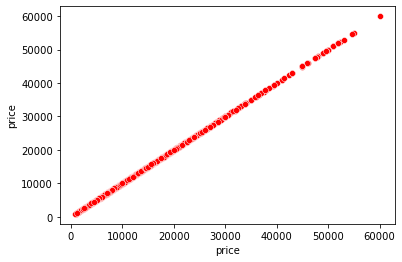

In [69]:
#sns.scatterplot(x='price', y='y_pred', data=df)
# Vaiya eta hocche na 


sns.scatterplot(x='price', y='price', data=df,color = 'red')
